In [311]:
#importing libraries
import pandas as pd #for data analysis and manipulation
import numpy as np #for numerical operations and mathematical functions
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns #for statistical graphics
from sklearn.model_selection import train_test_split #for training and testing 
from sklearn.preprocessing import MinMaxScaler,StandardScaler #for feature standardisation and normalisation
from sklearn.metrics import accuracy_score,classification_report #for model evaluation

#print to check importing of libraries
print("successfully imported")

successfully imported


#loading the dataset

In [312]:
df=pd.read_csv('Loan_Data.csv')
print("loading successfully")

loading successfully


In [313]:
#dataset info

In [314]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [315]:
#shape of the dataset
df.shape

(614, 13)

In [316]:
#dataset dimensions and statistics
num_rows,num_cols=df.shape
num_features=num_cols-1
num_data=num_rows*num_cols

#print the info
print("number of rows-",num_rows)
print("number of cols-",num_cols)
print("number of features-",num_features)
print("number of all data-",num_data)

number of rows- 614
number of cols- 13
number of features- 12
number of all data- 7982


In [317]:
#dataset basic info like - column_names,data_types,non-null values counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [318]:
#descriptive statistics of numeric variables 
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


Standard Deviation (std)= A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
min = The smallest value.
25% = It represents the value below which 25% of the data fall
50% = It represents the value below which 50% of the data fall
75% = It represents the value below which 75% of the data fall
max = The largest value.

In [319]:
#descriptive analysis of categorical variables only
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


#Exploratory Data Analysis(EDA) -
data visualisation 
data cleaning
data preprocessing


Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


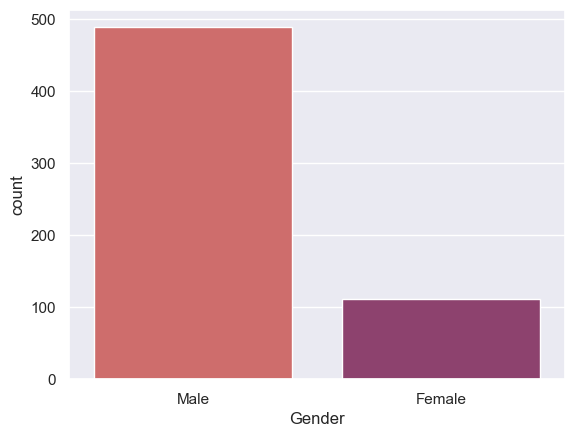

In [320]:
#data visualisation
GenderAnalysis=df.Gender.value_counts(dropna=False) #dropna - as false to count NaN(Not-a-Number) values
print(GenderAnalysis)
#bar chart analysis for gender feature
sns.countplot(x="Gender", data=df,palette="flare")
plt.show()

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


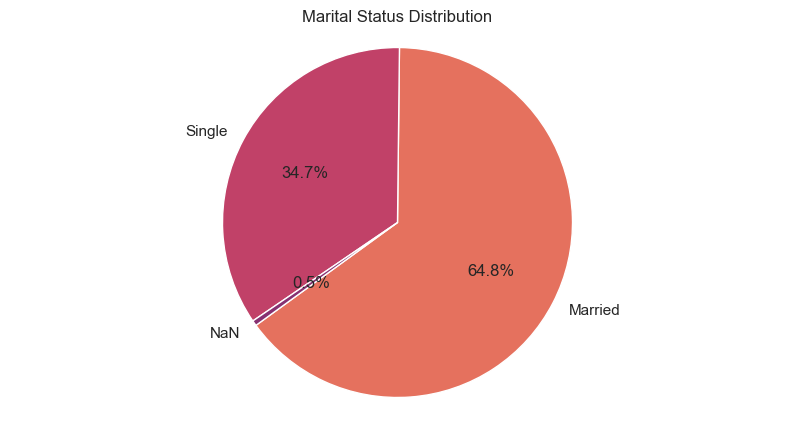

In [321]:
MarriedAnalysis=df.Married.value_counts(dropna=False)
print(MarriedAnalysis)

#Pie chart analysis for MarriedAnalysis
plt.figure(figsize=(10, 5)) # figure in inches
#labels by descending order
plt.pie(MarriedAnalysis, 
        labels=[("Married"),("Single"),("NaN")], 
        startangle=216, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("flare", 
        len(MarriedAnalysis)))
plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Marital Status Distribution')
plt.show()

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


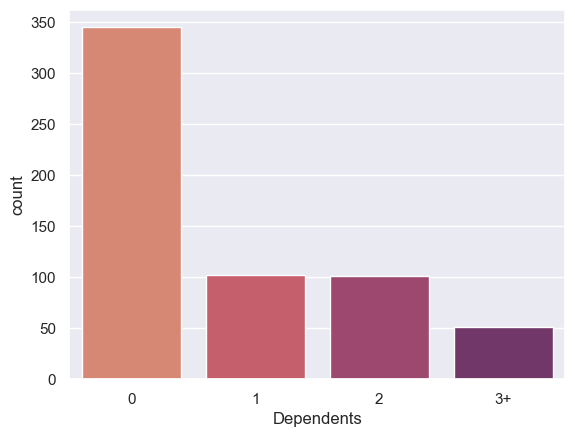

In [322]:
DependentsAnalysis = df.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)

#bar chart analysis for DependentAnalysis
sns.countplot(x="Dependents", data=df, palette="flare")
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


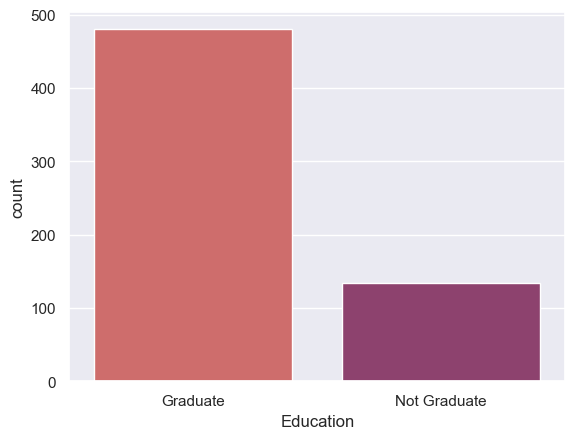

In [323]:
EducationAnalysis = df.Education.value_counts(dropna=False)
print(EducationAnalysis)

#bar chart analysis for EducationAnalysis
sns.countplot(x="Education", data=df, palette="flare")
plt.show()

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


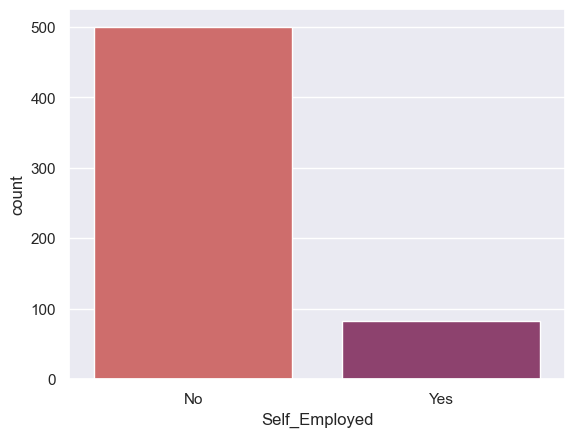

In [324]:
Self_EmployedAnalysis = df.Self_Employed.value_counts(dropna=False)
print(Self_EmployedAnalysis)

#bar chart analysis for Self_EmployedAnalysis
sns.countplot(x="Self_Employed", data=df, palette="flare")
plt.show()


The Average Income:  5403.459283387622
The ratio of people with income above average to below average:  40.182648401826484
Number of people income above the average: 176
Number of people income below the average:  438


C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


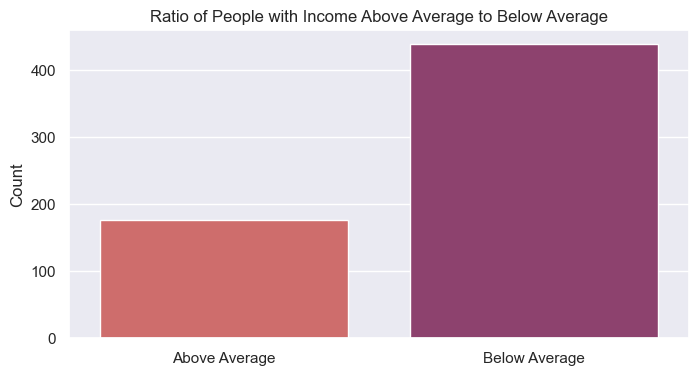

In [325]:
#calculate average income
average_income = df['ApplicantIncome'].mean()
print("The Average Income: ",average_income)


# Count incomes higher and lower than average
above_average_count = (df['ApplicantIncome'] > average_income).sum()
below_average_count = (df['ApplicantIncome'] <= average_income).sum()


#Calculate ratio and print the results
ratio = above_average_count / below_average_count
print("The ratio of people with income above average to below average: ",ratio*100)
print("Number of people income above the average:",above_average_count)
print("Number of people income below the average: ",below_average_count)


# Ratio plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()



Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


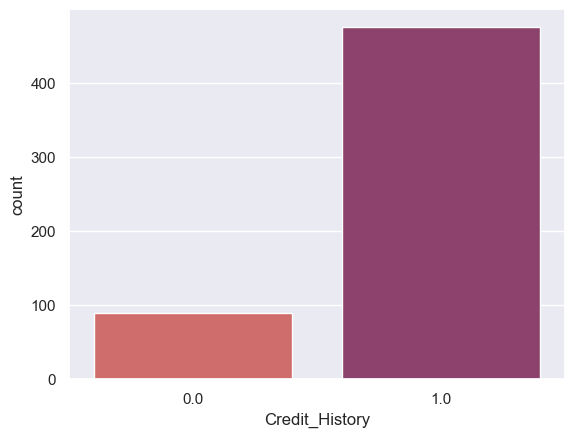

In [326]:
Credit_HistoryAnalysis = df.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)

#Bar Charts Analysis for Credit_HistoryAnalysis
sns.countplot(x="Credit_History", data=df, palette="flare")
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


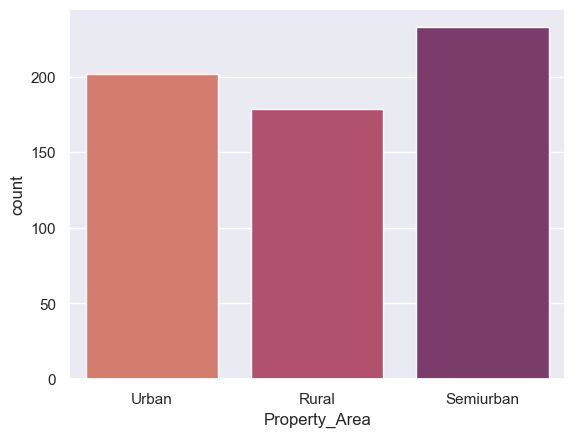

In [327]:
Property_AreaAnalysis = df.Property_Area.value_counts(dropna=False)
print(Property_AreaAnalysis)

# Bar Charts Analysis for Property_AreaAnalysis
sns.countplot(x="Property_Area", data=df, palette="flare")
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


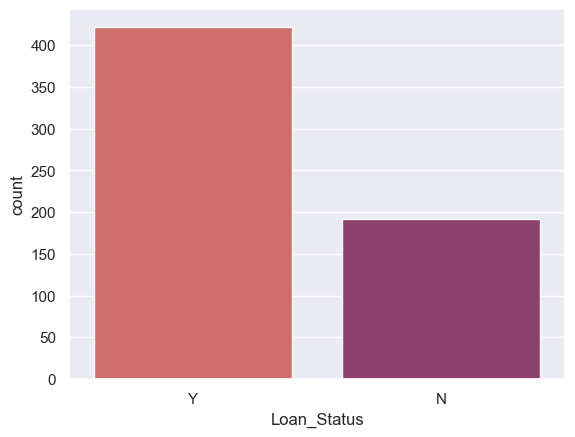

In [328]:
Loan_StatusAnalysis = df.Loan_Status.value_counts(dropna=False)
print(Loan_StatusAnalysis)

# Bar Charts Analysis for Loan_StatusAnalysis
sns.countplot(x="Loan_Status", data=df, palette="flare")
plt.show()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


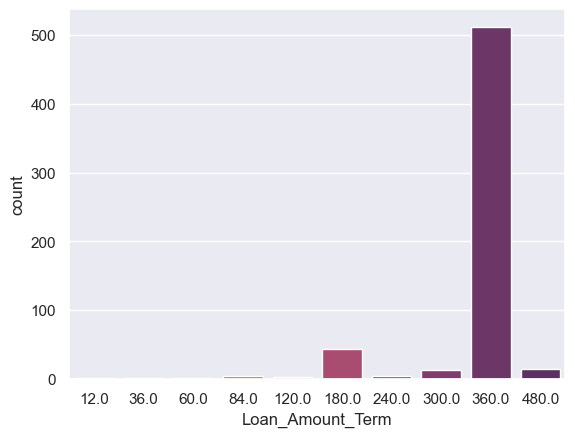

In [329]:
Loan_Amount_TermAnalysis = df.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

#Bar Charts Analysis for Loan_Amount_TermAnalysis
sns.countplot(x="Loan_Amount_Term", data=df, palette="flare")
plt.show()


C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


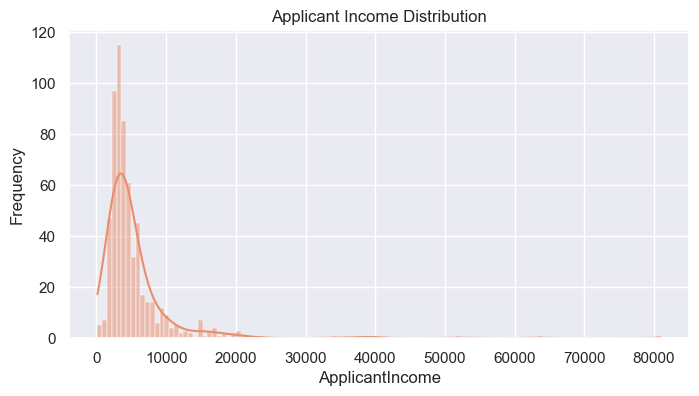

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


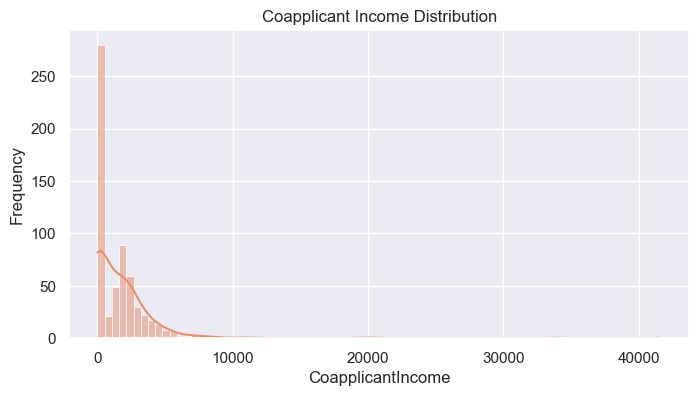

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


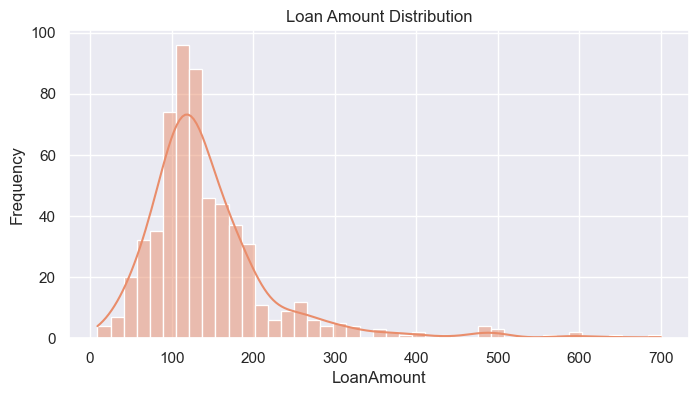

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


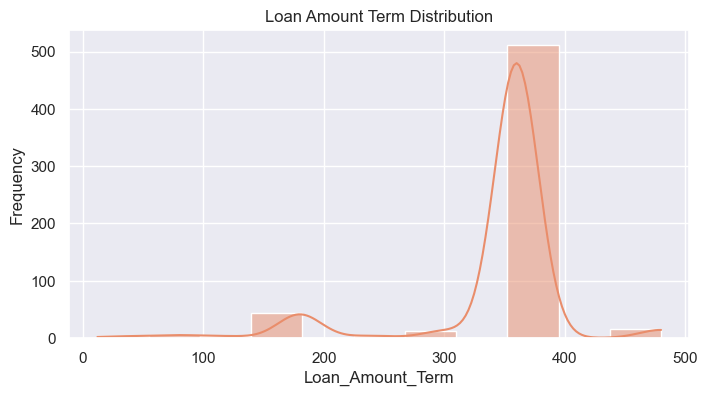

In [330]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# Set the seaborn theme palette
sns.set_theme(palette="flare")
#create a function for plot distribution 
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")

Correlation Analysis


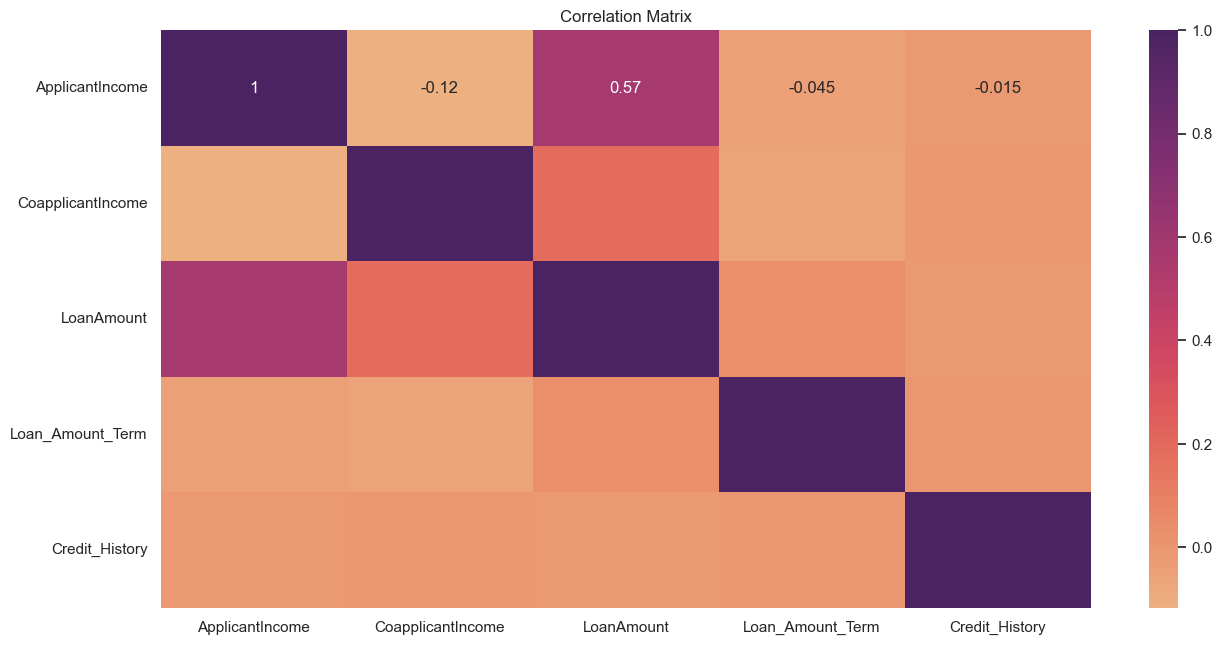

In [331]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot - write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


Positive correlation between Loan Amount and Applicant Income

Data Relationships Analysis

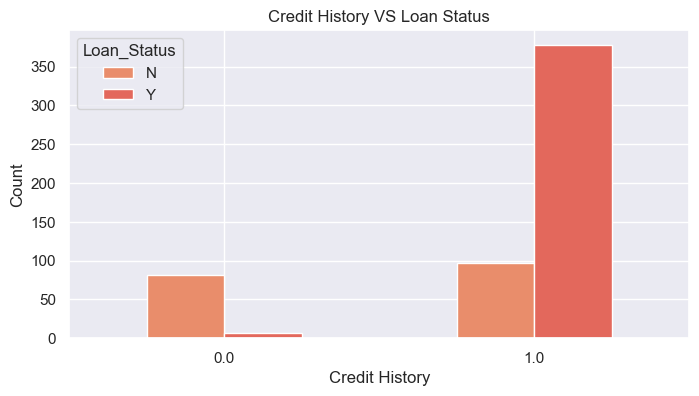

In [332]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(df.Credit_History, df.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit History VS Loan Status')

# Label the x-axis
plt.xlabel('Credit History')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

appears a good credit history significantly increases the chances of loan approval. Because the percentage of people who have a good credit history and are approved is much better than a bad credit history.

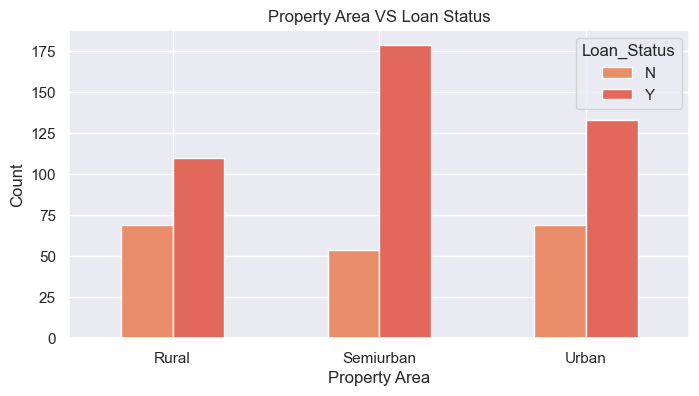

In [333]:
# Create a cross-tabulation of 'Property Area' and 'Loan Status' variables
pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Property Area VS Loan Status')

# Label the x-axis
plt.xlabel('Property Area')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

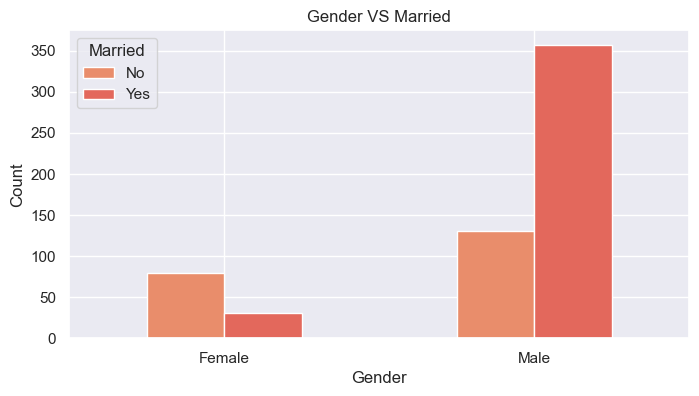

In [334]:
# Create a cross-tabulation of 'Gender' and 'Married' variables
pd.crosstab(df.Gender, df.Married).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Gender VS Married')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

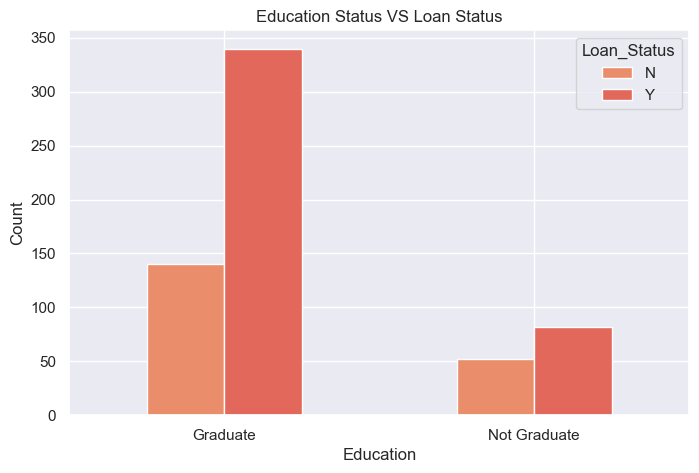

In [335]:
# Create a cross-tabulation of 'Gender' and 'Loan Status' variables
pd.crosstab(df.Education, df.Loan_Status).plot(kind="bar", figsize=(8, 5))

# Add a title to the plot
plt.title('Education Status VS Loan Status')

# Label the x-axis
plt.xlabel('Education')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

The analysis appears a graduate applicant significantly increases the chances of loan approval. Because the percentage of people who graduated and were approved is much better than who didn't graduate.

#Data Cleaning

In [336]:
# Check for missing values
null_counts = df.isnull().sum()

#Display the number of null values
print(null_counts)

#print the number of null values
print("total null values in the dataset-",null_counts.sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
total null values in the dataset- 149


In [337]:
# Fill the missing values for numerical data, .fillna = fill (NaN) values
# [0] This ensures that if there are multiple mode values, only the first one is selected.
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# The best way fill in the Loan Amount is the Mean (The average).
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

# The best way fill in the Credit History is the mode (Most common valus)
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])


# Fill the missing values for categorical data.
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])






In [338]:
# Checking for missing values after handling
null_counts = df.isnull().sum()

# Display the number of null values after handling
print(null_counts)

#print the number of null values
print("total null values in the dataset-",null_counts.sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
total null values in the dataset- 0


# Encoding the categorical values

In [339]:
import pandas as pd

# Assuming df is already loaded from a CSV or another source
# df = pd.read_csv('path_to_your_csv_file.csv')

# Display the original DataFrame shape
print(f"Original shape: {df.shape}")

# Ensure the DataFrame is not empty


    # One-hot encode categorical features, drop the first category to avoid multicollinearity
df = pd.get_dummies(df, drop_first=True)
    
    # Display the columns after one-hot encoding
print(f"Columns after one-hot encoding: {df.columns}")
    
    # Define the columns to drop if they exist
columns_to_drop = ['Loan_ID', 'Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No']
    
    # Check if columns exist before dropping them
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)
    
    # Rename the columns
new_columns_names = {
    'Gender_Male': 'Gender',
    'Married_Yes': 'Married',
    'Education_Graduate': 'Education',
    'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'
}
    
df = df.rename(columns=new_columns_names)
    
# Display the first few rows to check the changes
print(df.head())
    
# Display the columns and shape to verify the final DataFrame
print(f"Columns after renaming: {df.columns}")
print(f"The shape = {df.shape}")
    
# Transforming the target variable 'Loan_Status' to boolean
if 'Loan_Status' in df.columns:
    df['Loan_Status'] = df['Loan_Status'].astype(bool)
    
# Display the first few rows of the target variable to check the transformation
print("Transformed Target Variable (Y):")
print(df['Loan_Status'].head())



Original shape: (614, 13)
Columns after one-hot encoding: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001003',
       'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008',
       'Loan_ID_LP001011',
       ...
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object', length=628)
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Loan_ID_LP001003

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


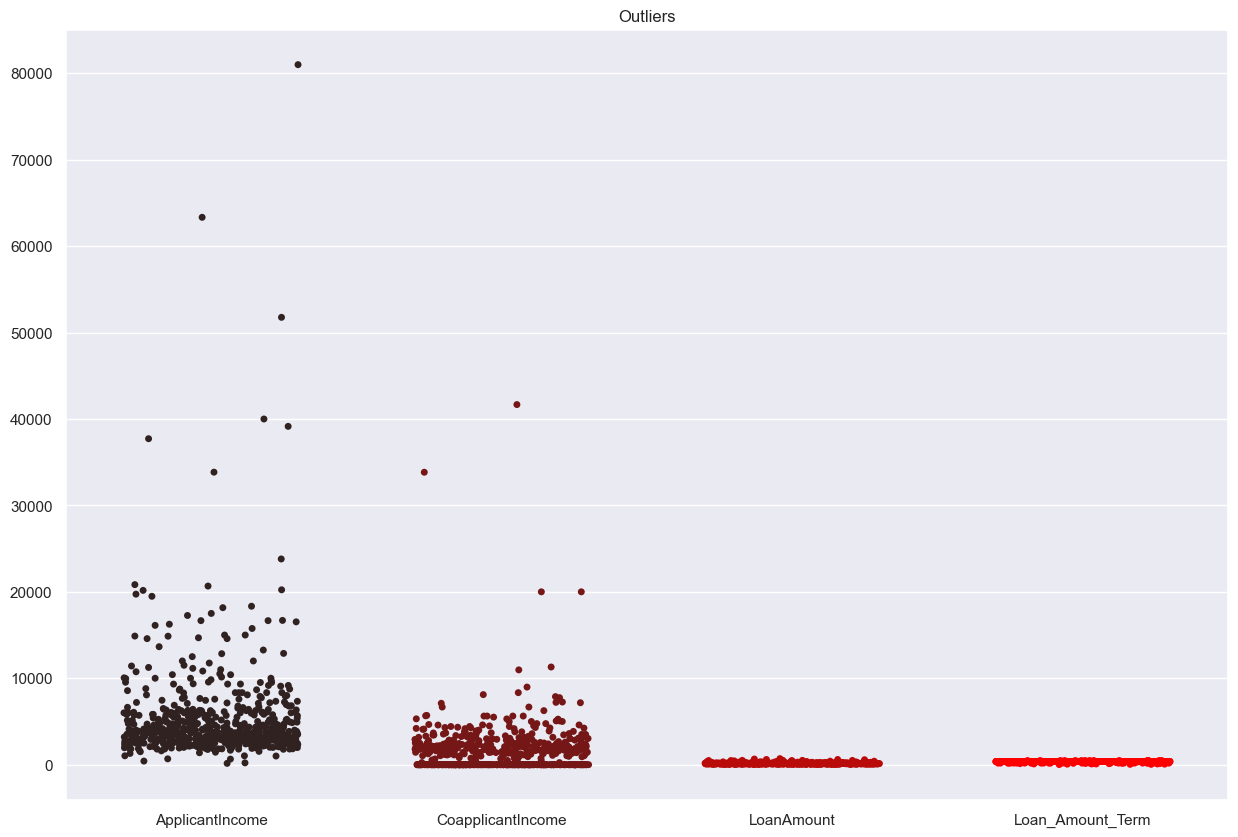

In [340]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

In [341]:
# IQR Scaling
#Q1 = df.astype(np.float32).quantile(0.25)
#Q3 = df.astype(np.float32).quantile(0.75)

# Calcuate the Interquartile Range (IQR)
#IQR = Q3 - Q1

# Removing Qutliers
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

# printing shape
#print(df.shape)

# Check and ensure running
#print("The task has been completed without any errors....")

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


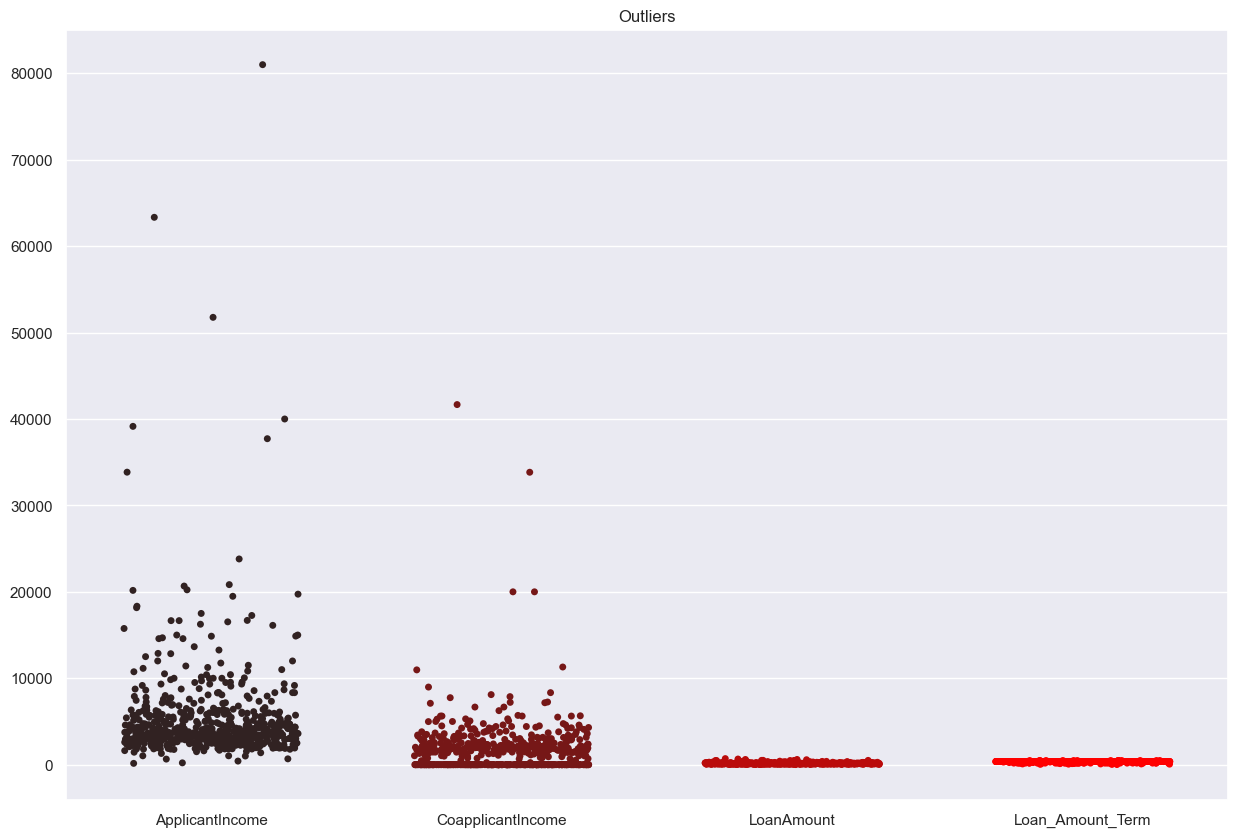

In [342]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


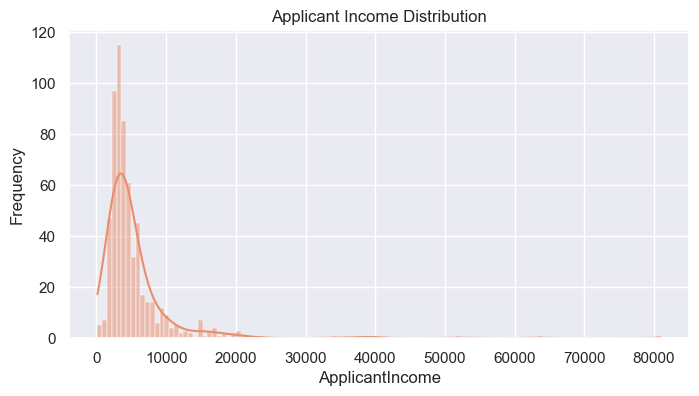

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


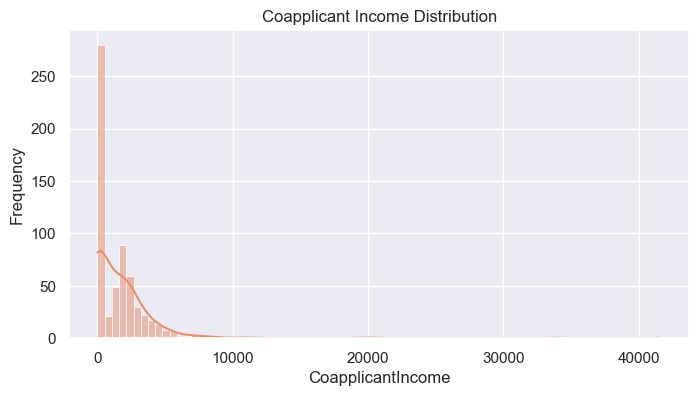

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


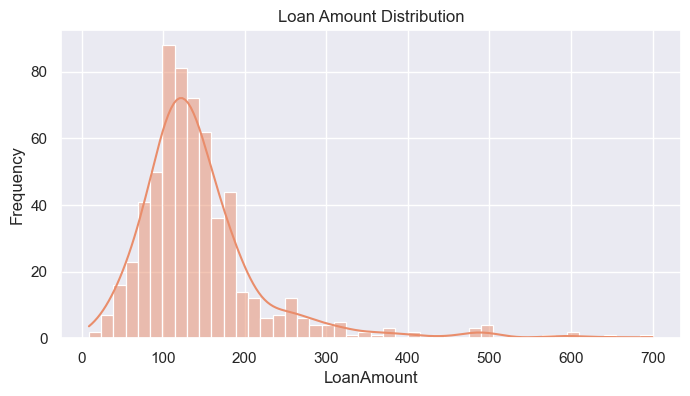

In [343]:
# Histogram distribution for numerical values

# Set the seaborn theme palette
sns.set_theme(palette="flare")

def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")

Handling Duplicates

In [344]:
# List of column names to check for duplicates (Numerical values)
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Iterate over each column name
for column_name in columns_to_check:
    # Checking for duplicate entries in the current column
    duplicate_count = df[column_name].duplicated().sum()
    
    # Output the result with a descriptive message
    if duplicate_count == 0:
        print("No duplicate entries found in the column.",column_name)
    else:
        print("Number of duplicate entries found in the {column_name} column: {duplicate_count}", "cyan")

Number of duplicate entries found in the {column_name} column: {duplicate_count} cyan
Number of duplicate entries found in the {column_name} column: {duplicate_count} cyan
Number of duplicate entries found in the {column_name} column: {duplicate_count} cyan
Number of duplicate entries found in the {column_name} column: {duplicate_count} cyan
Number of duplicate entries found in the {column_name} column: {duplicate_count} cyan


#Data Preprocessing-involves the following
Splitting data into "Features" - "Target"
SMOTE Technique
Data Re-scaling and Normalizing the features
Splitting data into "Training" - "Testing" Data

In [345]:
#splitting data into features and targets
# Features "Inputs" (X)
X = df.drop(columns=['Loan_Status'])

# Target variable "Outputs" (Y)
Y = df['Loan_Status']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (614, 626)
Shape of Y: (614,)


In [346]:
#Data Re-scaling and Normalizing the features¶
#Min-Max Scaling: transforms the features so that they fall within a specified range, typically between 0 and 1.

#Standardization: the features so that they have a mean of 0 , typically between -1 and 1.

# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)



In [347]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (491, 626)
Shape of X_test: (123, 626)
Shape of Y_train: (491,)
Shape of Y_test: (123,)


Model Selection- includes
Importing models for selection process
Training our models.
Decision Tree Classifier
Random Forest Classifier (Highest Accuracy)
Naives Bayes
GaussianNB (Suitable for continuous data)
BernoulliNB (Suitable for binary value)
Logistic Regression
Ridge Classifier CV
K-Nearest Neighbors (KNN)
For future searching
Support Vector Classifier
Gradient Boosting Classifier

In [ ]:
#1. Importing models for selection process¶

In [348]:
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier Model
from sklearn.neighbors import KNeighborsClassifier # For K-Nearest Neighbors Model
from sklearn.naive_bayes import GaussianNB,BernoulliNB  # For Gaussian,Bernoulli Naive Bayes Classifier Model
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression # For Ridge Classifier Cross-validated and Logistic Regression Models
from sklearn.svm import SVC  # For Support Vector Classifier Model
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting Classifier Model

# Printing a success message in green color
print("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...")

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


In [ ]:
#2. Training the Machine Learning Algorithms¶

In [362]:
# Decision Tree Classifier Parameters
# max_depth (The maximum depth of the tree "هو عدد الطبقات لاطول فرع من فروع الشجرة")
# min_samples_split (The minimum number of samples required to split an internal node "2 by default")
# min_samples_leaf (The minimum number of samples required to be at a leaf node)
# max_features (The number of features to consider when looking for the best split)

# Initialize lists to store training and testing accuracies
scoreListDT_Train = []
scoreListDT_Test = []

# Iterate over different values of max_depth
for i in range(1, 20):
    # Iterate over different values of min_samples_leaf
    for j in range(1, 5):
        # Create a Decision Tree model with the different values of max_depth, min_samples_leaf, and fixed max_features
        Model1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)

        # Fit the model on the training data
        Model1.fit(X_train, Y_train)

        # Calculate and store the training accuracy
        scoreListDT_Train.append(Model1.score(X_train, Y_train))

        # Calculate and store the testing accuracy
        scoreListDT_Test.append(Model1.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
DT_Accuracy_Train = max(scoreListDT_Train) 
DT_Accuracy_Test = max(scoreListDT_Test)

# Print the best accuracies achieved
print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")
# Print a success message indicating that the model has been trained successfully
print("The Decision Tree model has been trained successfully")
        


Decision Tree best accuracy (Training): 81.06%
Decision Tree best accuracy (Testing): 82.93%
The Decision Tree model has been trained successfully


In [363]:
#Model Evaluation
Training Score
Testing Score.
Choosing the better Model.

SyntaxError: invalid syntax (3025499174.py, line 2)

In [364]:
#Training Score¶
# Dictionary to store model names and their respective training scores (key:value)
model_train_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Train,
}

    

# Loop through each model and print the training score
for model_name, accuracy in model_train_scores.items():
    print("{model_name:<50} Training Score:",accuracy*100 )


{model_name:<50} Training Score: 81.05906313645622


In [365]:
#2. Testing Score¶
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
}
# Loop through each model and print the testing score
for model_name, accuracy in model_test_scores.items():
    print("{model_name:<50} Testing Score:",accuracy*100)


{model_name:<50} Testing Score: 82.92682926829268


In [366]:
#Model Deployment

In [368]:
import pickle

# File mode explanation:
# 'r'  - open for reading (default)
# 'w'  - open for writing, truncating the file first
# 'x'  - create a new file and open it for writing
# 'a'  - open for writing, appending to the end of the file if it exists
# 'b'  - binary mode
# 't'  - text mode (default)
# '+'  - open a disk file for updating (reading and writing)
# 'U'  - universal newline mode (deprecated)

# Define the filename for the pickle file
#filename = 'model.pkl'

# Save (serialize) the model to the file using pickle
# 'wb' mode opens the file in binary format for writing
 # Save (serialize) the model to a file using pickle
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(Model1, file)
    
print(f"Model saved to {filename}")

Model saved to model.pkl
